## DynamoDB Intro Workbook ##

This workbook will walk through the basics of getting started on DynamoDB. It is intended to demostrate the basic API building blocks that can then be combined for complex modeling (in subsequent labs). This lab uses Python 3 and the native DynamoDB SDK, and all setup and code samples are demostrated.  

<em>The AWS Boto3 SDK is pre-installed and a role with permissions to create and modify DynamoDB resources has been assigned to this instance. If you are running this on another Jupyter notebook you may need to install boto3 and configure permissions.</em>  

Let's get started! 

DynamoDB is a fast serverless scalable key-value and document database hosted on AWS.

The basic functional abstraction of DynamoDB is a Table. Data is organzed on a table with an index, which is required on all tables. An index can be a simple primary key, which consists of a partition key <em>(used for 1:1 modeling of key-value data)</em>. Or a compound primary key, which is created using partition and sort keys <em>(used for 1:n modeling of parent-child relationships and related items)</em>.

So, let's create our first table. Update the 'Name' value in the cell below with your initials and run the below code by clicking the 'Run' button in the toolbar above while your cursor is active in the next cell.  

It is going to take a minute to complete the creation of the new table. While it is pending, let's take a look at the code. You will notice that there are a couple important variables:  
1. Table Name: this must be unique within an account and region.
2. Key Schema: in the below example this is composite key with the partition (or HASH) key at RecipeName and the sort (or RANGE) key as Ingredients. You will notices that both are of AttributeType 'S' that means both are strings.

In [ ]:
import boto3
import json

Name='initialshere-RecipeTable'

# Set up the DynamoDB client (a low level API SDK). All requests are HTTPS requests. 
client = boto3.client('dynamodb', region_name = 'us-east-1')

print('Submitting table creation request... this may take a minute or two. When it completes, it will print details below... \n')

# Create the DynamoDB table.
response = client.create_table(
    TableName=Name, # <----- This is the table name
    KeySchema=[
        {
            'AttributeName': 'RecipeName', # <----- This is the partition key
            'KeyType': 'HASH'
        },
        {
            'AttributeName': 'Ingredients', # <----- This is the sort key
            'KeyType': 'RANGE'
        }
    ],
    AttributeDefinitions=[
        {
            'AttributeName': 'RecipeName',
            'AttributeType': 'S'
        },
        {
            'AttributeName': 'Ingredients',
            'AttributeType': 'S'
        },
    ],
    BillingMode= 'PAY_PER_REQUEST' 
)

# Wait until the table exists.
client.get_waiter('table_exists').wait(TableName=Name)

# Print out detailed data about the table.
response = client.describe_table(TableName=Name)

print(json.dumps(response, indent=1, default=str))
print("Table is active...")


Now, what did we just do? We created our first DynamoDB table called YourInitials-Recipes.  

We set the partition key to the Recipe Name and the sort key to the ingredients. While it doesn't have data yet, this table could look like:  

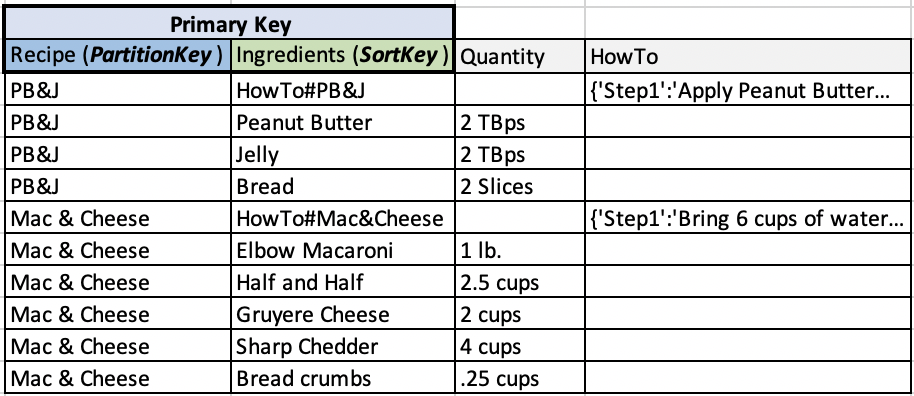  

We chose Recipe as the partition key because we are going to build the backend of an online cooking application, where we track all of the best recipes and their ingredients. The ingredients make a natural sort key, because they are directly related to the recipe. If you are familiar with traditional relational databases, you may wonder - 'but won't I have duplicate ingredients across recipes? Or, shouldn't ingredients be their own table?' Quite simply, this is a fundamental difference between relational and NoSQL data models. With NoSQL design, items are denormalized into prebuilt aggregates that are optimal for reads and minimal CPU overhead to retrieve data. In the above example, we can very efficiently retrieve all the ingredients of a single recipe... but we are getting ahead of ourselves.

Let's put some data into the table to see what it looks like!

